<div style="text-align: center;">
    <h1> SPEKTRA RECOMMENDATION SYSTEM WITH SEGMENTATION </h1>
    <p>Project ini ditujukan untuk Line of Business SPEKTRA</p>
</div>

<div style="text-align: center;">
    <img src="./SpektraImage.jpg" width="300">
</div>

# **Define (Menentukan Masalah) 📝**

### **1. Latar Belakang**

Tim sales SPEKTRA mengalami kendala dalam meningkatkan tingkat konversi booking karena kurangnya personalisasi dalam penawaran produk. Strategi pemasaran saat ini masih berbasis metode konvensional tanpa adanya pendekatan berbasis data.

#### **2. Permasalahan Utama**

- Sistem pemasaran masih konvensional dan belum memanfaatkan analisis data pelanggan.
- Kurangnya efektivitas dalam penawaran produk, sehingga tingkat konversi rendah.
- Anggaran pemasaran belum teralokasi optimal kepada pelanggan potensial.

#### **3. Tujuan Proyek**

Mengembangkan **Sistem Penargetan Penawaran dan Rekomendasi Produk Pada Event SPEKTRA** menggunakan pendekatan **CRM Data Mining** untuk meningkatkan efektivitas pemasaran dan alokasi anggaran dengan lebih tepat sasaran.

#### **4. Pendekatan yang Digunakan**

Untuk menyelesaikan permasalahan ini, metode **DMAIC (Define, Measure, Analyze, Improve, Control)** akan diterapkan guna mendesain proses yang terstruktur. Pada tahap **Define**, langkah-langkah utama yang dilakukan adalah:
- Mengidentifikasi masalah berdasarkan data transaksi pelanggan dan pola pembelian.
- Menentukan metrik keberhasilan proyek (misalnya, peningkatan tingkat konversi booking).
- Memastikan bahwa solusi yang dikembangkan dapat diimplementasikan dalam sistem internal FIFGROUP.

#### **5. Expected Outcome**

- Terbangunnya sistem rekomendasi berbasis data yang mampu memberikan penawaran lebih personal kepada pelanggan.
- Meningkatkan tingkat konversi penawaran menjadi booking.
- Mengoptimalkan anggaran pemasaran dengan menargetkan pelanggan yang memiliki potensi tinggi.


# **Measure (Mengumpulkan Data & Menganalisisnya) 📊**

### **Install Library**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from scipy.stats import zscore
from sklearn.cluster import MiniBatchKMeans
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

### **Setting option All Columns view**

In [26]:
pd.set_option('display.max_columns', None)  

### **Read Data from Dataset**

In [27]:
try:
    data_spektra = pd.read_excel('SPEKTRA_DATA_CUSTOMER.xlsx')
    print("Data berhasil dimuat.")
except FileNotFoundError:
    print("Error: File tidak ditemukan. Pastikan file 'SPEKTRA_DATA_CUSTOMER.xlsx' ada di direktori yang benar.")
except Exception as e:
    print(f"Terjadi kesalahan: {e}")

data_spektra.head()

Data berhasil dimuat.


,CUST_NO,FIRST_PPC,FIRST_PPC_DATE,FIRST_MPF_DATE,LAST_MPF_DATE,JMH_CON_SBLM_MPF,MAX_MPF_AMOUNT,MIN_MPF_AMOUNT,AVG_MPF_INST,MPF_CATEGORIES_TAKEN,AVG_MONTHS_BETWEEN_MPF,LAST_MPF_PURPOSE,LAST_MPF_AMOUNT,LAST_MPF_TOP,LAST_MPF_INST,PPC,JMH_PPC,JMH_CON_NON_MPF,PROGRESSION_PATTERNS,BUSS_UNIT,MONTH_INST,CONTRACT_ACTIVE_DATE,PRINCIPAL,GRS_DP,BIRTH_DATE,CUST_SEX,EDU_TYPE,OCPT_CODE,HOUSE_STAT,MARITAL_STAT,NO_OF_DEPEND,BRANCH_ID,AREA,TOTAL_AMOUNT_MPF,TOTAL_PRODUCT_MPF
0,101000001159,REFI,20211111,20230125,20230125,1,4299000,4299000,4.600000e+05,GADGET,NaN,GADGET,4299000,15,460000,"MPF,REFI",2,NaN,"REFI, REFI, REFI, MPF, REFI",REFI,500000.0,3/30/2023 12:27:38 PM,4240000,1250000,10/13/1971,M,S1,1.0,H02,M,2.0,13300,JATA 1,4299000,1
1,101000002364,NMC,20201024,20211208,20211208,1,8712000,8712000,1.242000e+06,GADGET,NaN,GADGET,8712000,9,1242000,"MPF,NMC,REFI",3,NaN,"NMC, MPF, REFI",REFI,2417000.0,5/30/2022 3:04:40 PM,18077500,5750000,1969-11-02 00:00:00,F,SP,23.0,H01,M,5.0,12800,JATA 1,8712000,1
2,101000003528,MPF,20191119,20191119,20210312,4,6709000,4347000,6.402500e+05,"ELECTRONIC, ELECTRONIC, ELECTRONIC, ELECTRONIC",5.258065,ELECTRONIC,6709000,12,812000,MPF,1,NaN,"MPF, MPF, MPF, MPF",MPF,812000.0,2021-12-03 17:35:18,6709000,225000,1967-11-01 00:00:00,F,SA,4.0,H01,M,1.0,12800,JATA 1,21841000,4
3,101000003848,REFI,20180710,20200923,20220628,3,3999000,2752000,3.876667e+05,"GADGET, GADGET, GADGET",10.580645,GADGET,2752000,12,311000,"MPF,REFI",2,NaN,"REFI, REFI, REFI, MPF, MPF, MPF",MPF,311000.0,6/28/2022 3:30:13 PM,2752000,49000,1968-10-07 00:00:00,M,S1,4.0,H01,M,1.0,15600,JATA 2,9535000,3
4,101000004460,MPF,20220607,20220607,20220607,1,3708000,3708000,5.370000e+05,GADGET,NaN,GADGET,3708000,9,537000,"REFI,MPF",2,NaN,"MPF, REFI",REFI,633000.0,6/17/2022 11:05:41 AM,8232500,1425000,8/13/1976,M,SA,14.0,H01,D,2.0,15600,JATA 2,3708000,1


In [28]:
data_rumah = data_spektra['HOUSE_STAT'].unique()

In [29]:
data_rumah

array(['H02', 'H01', 'H04', 'H05', 'H03', 'H06', 'H07', nan], dtype=object)

## **Data Understanding**

# Struktur Data Pelanggan

### 1. Identitas dan Demografi Pelanggan
- **CUST_NO** → ID unik pelanggan
- **BIRTH_DATE** → Tanggal lahir pelanggan
- **CUST_SEX** → Jenis kelamin pelanggan
- **EDU_TYPE** → Tingkat pendidikan pelanggan
- **OCPT_CODE** → Kode pekerjaan pelanggan
- **MARITAL_STAT** → Status pernikahan pelanggan
- **NO_OF_DEPEND** → Jumlah tanggungan pelanggan
- **HOUSE_STAT** → Status kepemilikan rumah

### 2. Riwayat Pembiayaan & Transaksi
- **FIRST_PPC** → Jenis produk pertama yang diambil pelanggan
- **FIRST_PPC_DATE** → Tanggal pembelian pertama pelanggan
- **FIRST_MPF_DATE** → Tanggal pertama pelanggan mengambil pembiayaan MPF
- **LAST_MPF_DATE** → Tanggal terakhir pelanggan melakukan transaksi MPF
- **JMH_CON_SBLM_MPF** → Jumlah kontrak sebelum MPF terakhir
- **MPF_CATEGORIES_TAKEN** → Kategori produk yang pernah diambil pelanggan
- **LAST_MPF_PURPOSE** → Tujuan pembelian terakhir pelanggan
- **LAST_MPF_AMOUNT** → Nilai transaksi terakhir pelanggan
- **LAST_MPF_TOP** → Produk terakhir yang diambil pelanggan
- **LAST_MPF_INST** → Jumlah cicilan dari pembelian terakhir pelanggan
- **JMH_PPC** → Jumlah total PPC (kontrak pembiayaan pelanggan)
- **JMH_CON_NON_MPF** → Jumlah kontrak non-MPF yang dimiliki pelanggan

### 3. Pola Pembiayaan & Keuangan
- **PROGRESSION_PATTERNS** → Pola perkembangan pelanggan dalam pembiayaan
- **MAX_MPF_AMOUNT** → Nilai pembiayaan MPF terbesar xayang pernah diambil pelanggan
- **MIN_MPF_AMOUNT** → Nilai pembiayaan MPF terkecil yang pernah diambil pelanggan
- **AVG_MPF_INST** → Rata-rata cicilan per bulan pelanggan
- **AVG_MONTHS_BETWEEN_MPF** → Rata-rata waktu antar transaksi MPF pelanggan
- **MONTH_INST** → Jumlah bulan angsuran pelanggan (tenor cicilan)
- **CONTRACT_ACTIVE_DATE** → Tanggal kontrak aktif terakhir pelanggan
- **PRINCIPAL** → Nilai pokok pembiayaan pelanggan
- **GRS_DP** → Uang muka (*down payment*) yang dibayarkan pelanggan
- **TOTAL_AMOUNT_MPF** → Total nilai pembiayaan MPF yang pernah diambil pelanggan

### 4. Data Lokasi & Cabang
- **BRANCH_ID** → ID cabang tempat pelanggan melakukan kontrak
- **AREA** → Wilayah geografis pelanggan

### 5. Data Tambahan & Produk
- **TOTAL_PRODUCT_MPF** → Total jumlah produk yang pernah dibeli pelanggan


### **Cek Tipe Data**

In [30]:
data_spektra.dtypes

CUST_NO                     int64
FIRST_PPC                  object
FIRST_PPC_DATE              int64
FIRST_MPF_DATE              int64
LAST_MPF_DATE               int64
JMH_CON_SBLM_MPF            int64
MAX_MPF_AMOUNT              int64
MIN_MPF_AMOUNT              int64
AVG_MPF_INST              float64
MPF_CATEGORIES_TAKEN       object
AVG_MONTHS_BETWEEN_MPF    float64
LAST_MPF_PURPOSE           object
LAST_MPF_AMOUNT             int64
LAST_MPF_TOP                int64
LAST_MPF_INST               int64
PPC                        object
JMH_PPC                     int64
JMH_CON_NON_MPF           float64
PROGRESSION_PATTERNS       object
BUSS_UNIT                  object
MONTH_INST                float64
CONTRACT_ACTIVE_DATE       object
PRINCIPAL                   int64
GRS_DP                      int64
BIRTH_DATE                 object
CUST_SEX                   object
EDU_TYPE                   object
OCPT_CODE                 float64
HOUSE_STAT                 object
MARITAL_STAT  

### **Data Formatting**

In [31]:

data_spektra['FIRST_PPC_DATE'] = pd.to_datetime(data_spektra['FIRST_PPC_DATE'], format='%Y%m%d', errors='coerce')
data_spektra['FIRST_MPF_DATE'] = pd.to_datetime(data_spektra['FIRST_MPF_DATE'], format='%Y%m%d', errors='coerce')
data_spektra['LAST_MPF_DATE'] = pd.to_datetime(data_spektra['LAST_MPF_DATE'], format='%Y%m%d', errors='coerce')
data_spektra['CONTRACT_ACTIVE_DATE'] = pd.to_datetime(data_spektra['CONTRACT_ACTIVE_DATE'], errors='coerce')
data_spektra['BIRTH_DATE'] = pd.to_datetime(data_spektra['BIRTH_DATE'], errors='coerce')

In [32]:
data_spektra['CONTRACT_ACTIVE_DATE'] = pd.to_datetime(data_spektra['CONTRACT_ACTIVE_DATE'], errors='coerce')
data_spektra['YearMonth'] = data_spektra['CONTRACT_ACTIVE_DATE'].dt.to_period('M')  

In [33]:
data_spektra['BIRTH_DATE'] = pd.to_datetime(data_spektra['BIRTH_DATE'], errors='coerce')

# Hitung usia berdasarkan tahun 2024 akhir (31 Desember 2024)
data_spektra['Usia'] = 2024 - data_spektra['BIRTH_DATE'].dt.year

### **Konversi Tipe Datetime**

In [34]:
data_spektra['OCPT_CODE'] = data_spektra['OCPT_CODE'].astype('Int64')
data_spektra['NO_OF_DEPEND'] = data_spektra['NO_OF_DEPEND'].astype('Int64')


print(data_spektra.dtypes)

CUST_NO                            int64
FIRST_PPC                         object
FIRST_PPC_DATE            datetime64[ns]
FIRST_MPF_DATE            datetime64[ns]
LAST_MPF_DATE             datetime64[ns]
JMH_CON_SBLM_MPF                   int64
MAX_MPF_AMOUNT                     int64
MIN_MPF_AMOUNT                     int64
AVG_MPF_INST                     float64
MPF_CATEGORIES_TAKEN              object
AVG_MONTHS_BETWEEN_MPF           float64
LAST_MPF_PURPOSE                  object
LAST_MPF_AMOUNT                    int64
LAST_MPF_TOP                       int64
LAST_MPF_INST                      int64
PPC                               object
JMH_PPC                            int64
JMH_CON_NON_MPF                  float64
PROGRESSION_PATTERNS              object
BUSS_UNIT                         object
MONTH_INST                       float64
CONTRACT_ACTIVE_DATE      datetime64[ns]
PRINCIPAL                          int64
GRS_DP                             int64
BIRTH_DATE      

### Insight 1 : Distribusi AREA berdasarkan jumlah Pelanggan

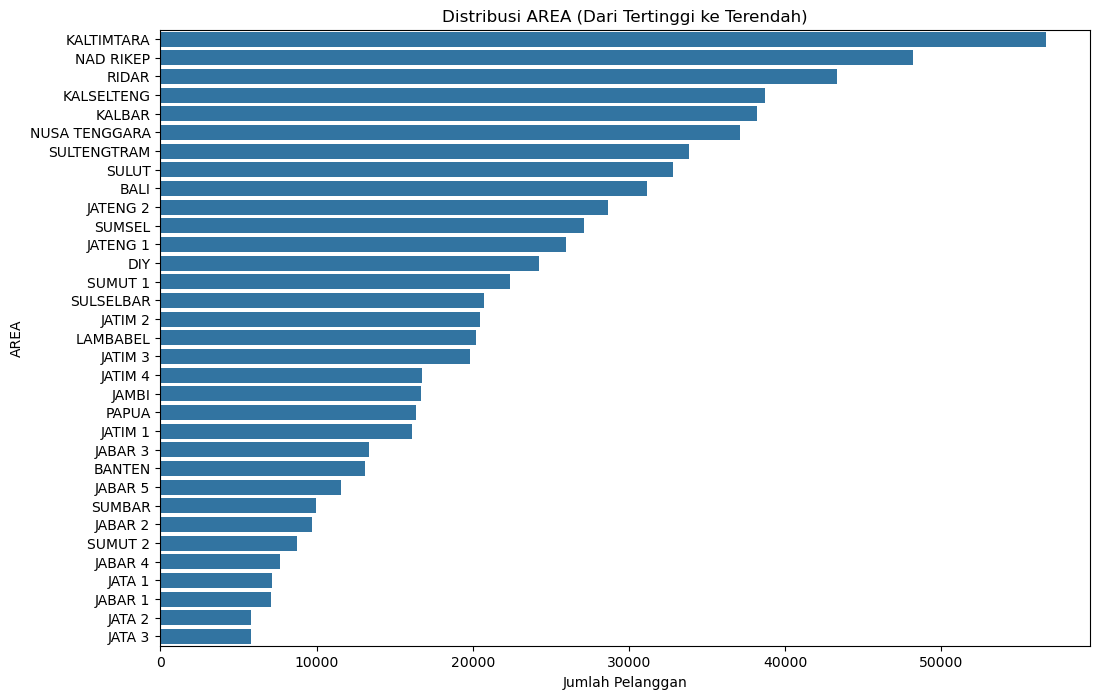

In [35]:
plt.figure(figsize=(12, 8))  
sns.countplot(
    y=data_spektra['AREA'], 
    order=data_spektra['AREA'].value_counts().index  
)
plt.title("Distribusi AREA (Dari Tertinggi ke Terendah)")
plt.xlabel("Jumlah Pelanggan")
plt.ylabel("AREA")

plt.show()

### Insight 2 : Trendline Jumlah Kontrak

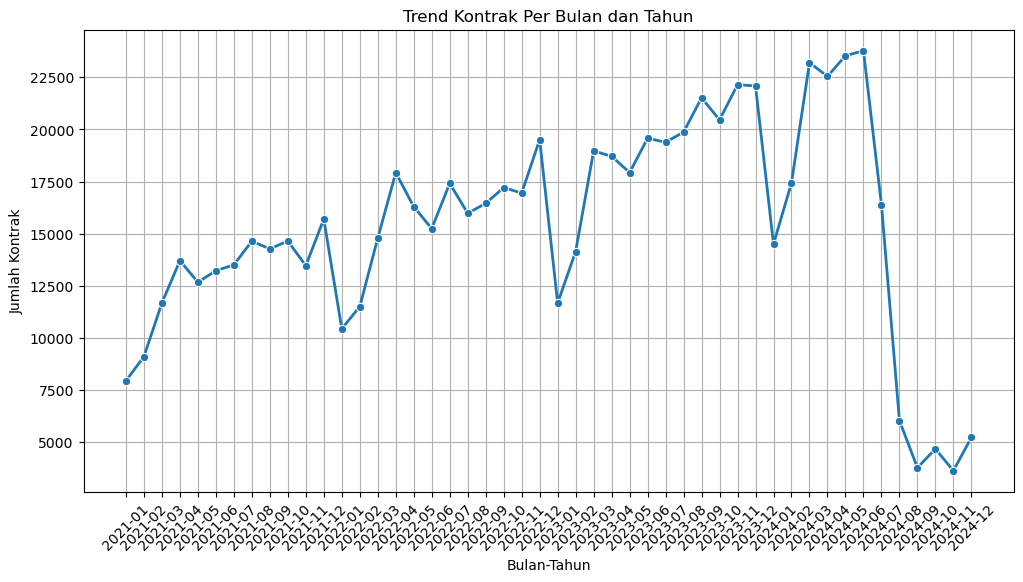

In [36]:
contract_trend = data_spektra.groupby('YearMonth').size()

plt.figure(figsize=(12, 6))
sns.lineplot(x=contract_trend.index.astype(str), y=contract_trend.values, marker="o", linewidth=2)
plt.xticks(rotation=45)  # Rotasi label 
plt.title("Trend Kontrak Per Bulan dan Tahun")
plt.xlabel("Bulan-Tahun")
plt.ylabel("Jumlah Kontrak")
plt.grid(True)
plt.show()

### Insight 3 : Distribusi FIRST_PPC dengan Jumlah Aktual

/var/folders/sh/_6wg56x97y7b5__x4qlx17hm0000gn/T/ipykernel_17245/1151536701.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=first_ppc_counts.index, x=first_ppc_counts.values, palette="viridis")


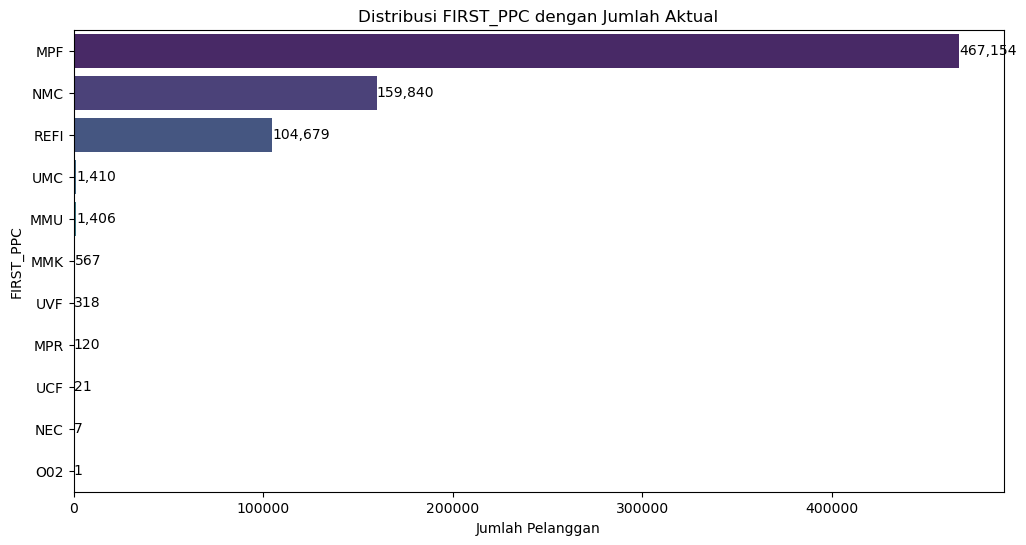

In [37]:
first_ppc_counts = data_spektra['FIRST_PPC'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(y=first_ppc_counts.index, x=first_ppc_counts.values, palette="viridis")

for index, value in enumerate(first_ppc_counts.values):
    plt.text(value, index, f'{value:,}', va='center') 

plt.title("Distribusi FIRST_PPC dengan Jumlah Aktual")
plt.xlabel("Jumlah Pelanggan")
plt.ylabel("FIRST_PPC")
plt.show()

### Insight 4 : Distribusi Usia Pelanggan

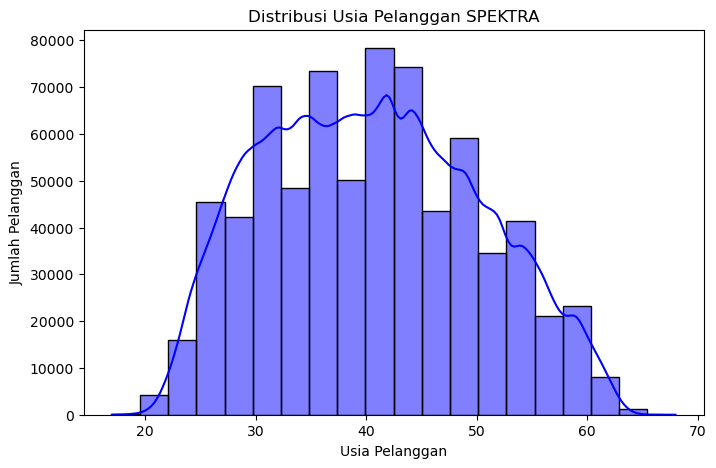

In [38]:
plt.figure(figsize=(8, 5))
sns.histplot(data_spektra["Usia"], bins=20, kde=True, color="blue")
plt.xlabel("Usia Pelanggan")
plt.ylabel("Jumlah Pelanggan")
plt.title("Distribusi Usia Pelanggan SPEKTRA")
plt.show()

### Insight 4.1 : Usia Pelanggan berdasarkan Jenis Kelamin

/var/folders/sh/_6wg56x97y7b5__x4qlx17hm0000gn/T/ipykernel_17245/2916129250.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="CUST_SEX", y="Usia", data=data_spektra, palette="coolwarm")


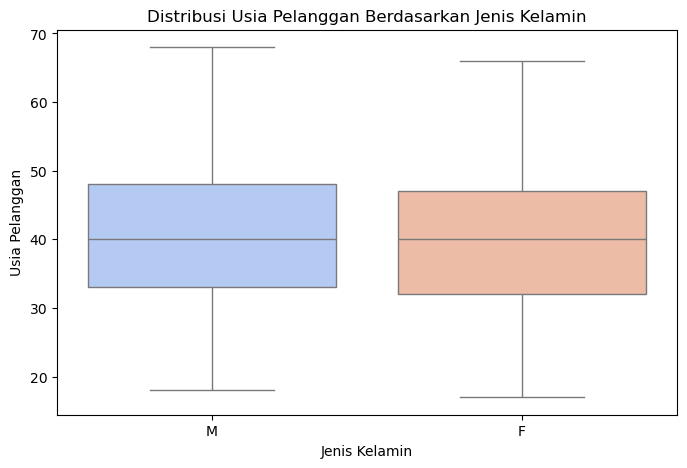

In [39]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="CUST_SEX", y="Usia", data=data_spektra, palette="coolwarm")
plt.xlabel("Jenis Kelamin")
plt.ylabel("Usia Pelanggan")
plt.title("Distribusi Usia Pelanggan Berdasarkan Jenis Kelamin")
plt.show()

### Insight 5 : Hubungan usia dengan Total Pembiayaan MPF

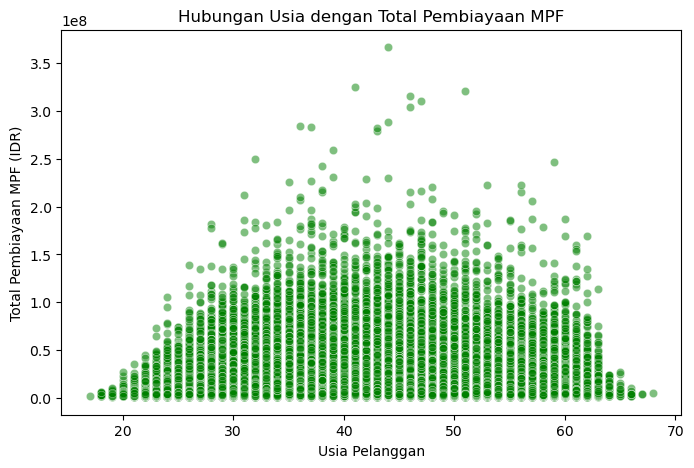

In [40]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data_spektra["Usia"], y=data_spektra["TOTAL_AMOUNT_MPF"], alpha=0.5, color="green")
plt.xlabel("Usia Pelanggan")
plt.ylabel("Total Pembiayaan MPF (IDR)")
plt.title("Hubungan Usia dengan Total Pembiayaan MPF")
plt.show()

### Insight 6 : Hubungan antara Tenor Cicilan dan Total Pembiayaan 

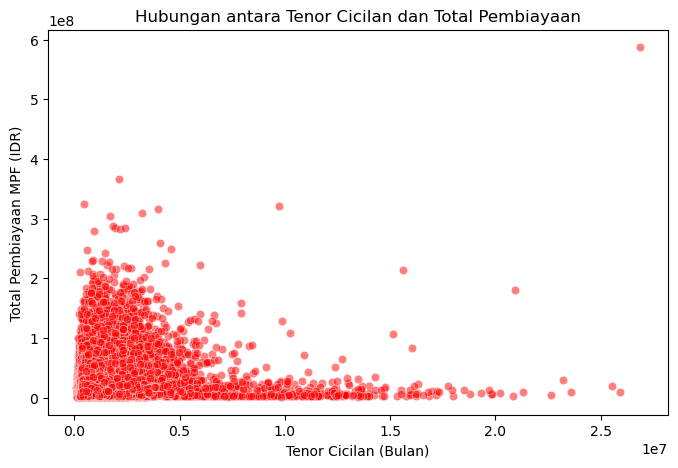

In [41]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data_spektra["MONTH_INST"], y=data_spektra["TOTAL_AMOUNT_MPF"], alpha=0.5, color="red")
plt.xlabel("Tenor Cicilan (Bulan)")
plt.ylabel("Total Pembiayaan MPF (IDR)")
plt.title("Hubungan antara Tenor Cicilan dan Total Pembiayaan")
plt.show()

### Insight 7 : Rata-rata pembiayaan per Kategori Produk di SPEKTRA

/var/folders/sh/_6wg56x97y7b5__x4qlx17hm0000gn/T/ipykernel_17245/2876040078.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_mpf_per_category.index, y=avg_mpf_per_category.values, palette="magma")


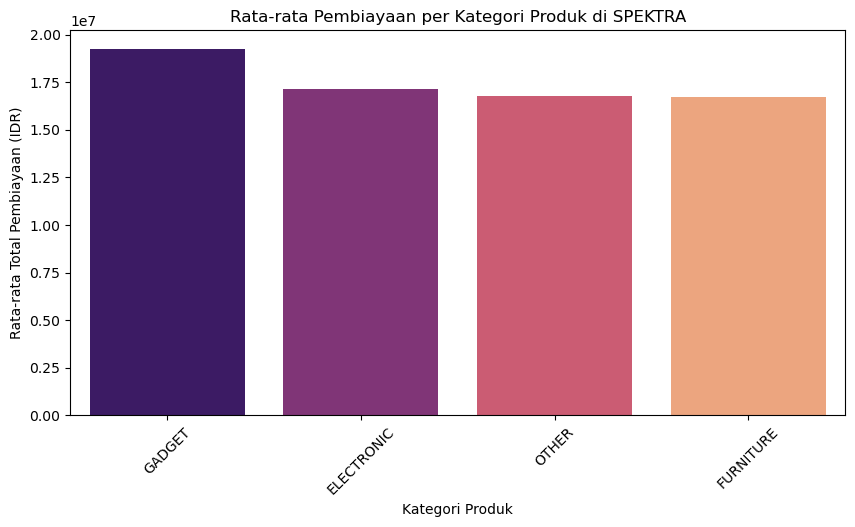

In [42]:
df_exploded = data_spektra.assign(MPF_CATEGORIES_TAKEN=data_spektra["MPF_CATEGORIES_TAKEN"].str.split(", ")).explode("MPF_CATEGORIES_TAKEN")

avg_mpf_per_category = df_exploded.groupby("MPF_CATEGORIES_TAKEN")["TOTAL_AMOUNT_MPF"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_mpf_per_category.index, y=avg_mpf_per_category.values, palette="magma")
plt.xlabel("Kategori Produk")
plt.ylabel("Rata-rata Total Pembiayaan (IDR)")
plt.title("Rata-rata Pembiayaan per Kategori Produk di SPEKTRA")
plt.xticks(rotation=45)
plt.show()

### Insight 8 : Distribusi Jumlah Produk yang DIambil oleh pelanggan SPEKTRA

Jumlah pelanggan yang mengambil lebih dari satu produk: 364141
Persentase pelanggan yang mengambil lebih dari satu produk: 49.51%


/var/folders/sh/_6wg56x97y7b5__x4qlx17hm0000gn/T/ipykernel_17245/3192548111.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_spektra["Jumlah_Kategori_Produk"], palette="viridis")


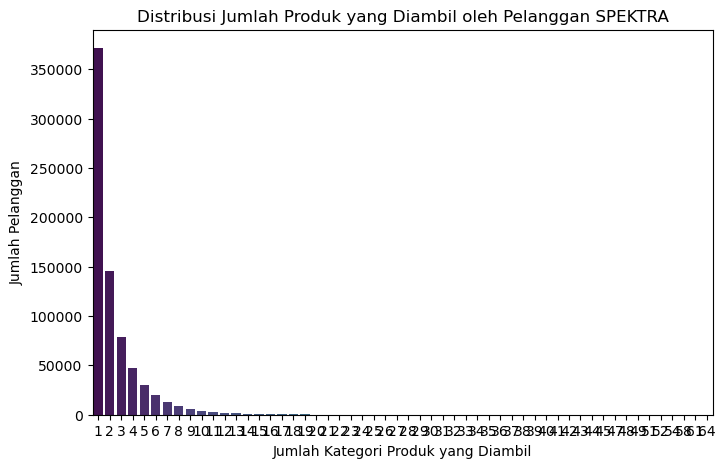

In [43]:
data_spektra["Jumlah_Kategori_Produk"] = data_spektra["MPF_CATEGORIES_TAKEN"].str.count(", ") + 1

multi_product_customers = data_spektra[data_spektra["Jumlah_Kategori_Produk"] > 1].shape[0]
total_customers = data_spektra.shape[0]
percentage_multi_product = (multi_product_customers / total_customers) * 100
_
print(f"Jumlah pelanggan yang mengambil lebih dari satu produk: {multi_product_customers}")
print(f"Persentase pelanggan yang mengambil lebih dari satu produk: {percentage_multi_product:.2f}%")

plt.figure(figsize=(8, 5))
sns.countplot(x=data_spektra["Jumlah_Kategori_Produk"], palette="viridis")
plt.xlabel("Jumlah Kategori Produk yang Diambil")
plt.ylabel("Jumlah Pelanggan")
plt.title("Distribusi Jumlah Produk yang Diambil oleh Pelanggan SPEKTRA")
plt.show()

### Insight 9 : Proporsi RO VS New One-Time Customer

Jumlah pelanggan yang kembali mengambil pembiayaan (Multi-Transaction_Customer): 364141
Persentase Multi-Transaction_Customer: 49.51%


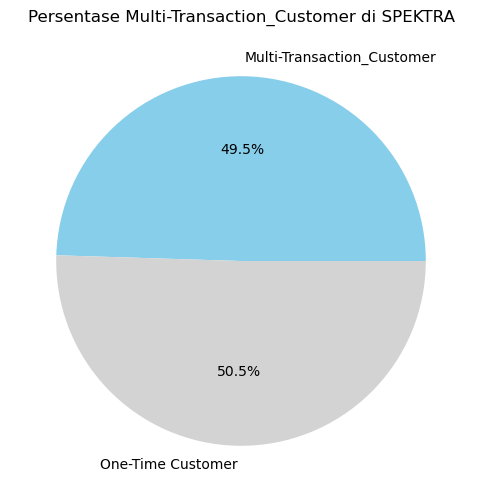

In [44]:
Multi_Transaction_Customer = data_spektra[data_spektra["TOTAL_PRODUCT_MPF"] > 1].shape[0]
total_customers = data_spektra.shape[0]

repeat_percentage = (Multi_Transaction_Customer / total_customers) * 100

print(f"Jumlah pelanggan yang kembali mengambil pembiayaan (Multi-Transaction_Customer): {Multi_Transaction_Customer}")
print(f"Persentase Multi-Transaction_Customer: {repeat_percentage:.2f}%")

plt.figure(figsize=(6, 6))
plt.pie([Multi_Transaction_Customer, total_customers - Multi_Transaction_Customer], 
        labels=["Multi-Transaction_Customer", "One-Time Customer"], 
        autopct='%1.1f%%', colors=["skyblue", "lightgrey"])
plt.title("Persentase Multi-Transaction_Customer di SPEKTRA")
plt.show()

### Insight 10 : Proporsi Customer RO pilih kategori sama atau beda

Pelanggan yang mengambil kategori produk yang sama: 157048 (43.13%)
Pelanggan yang berpindah ke kategori lain: 207093 (56.87%)


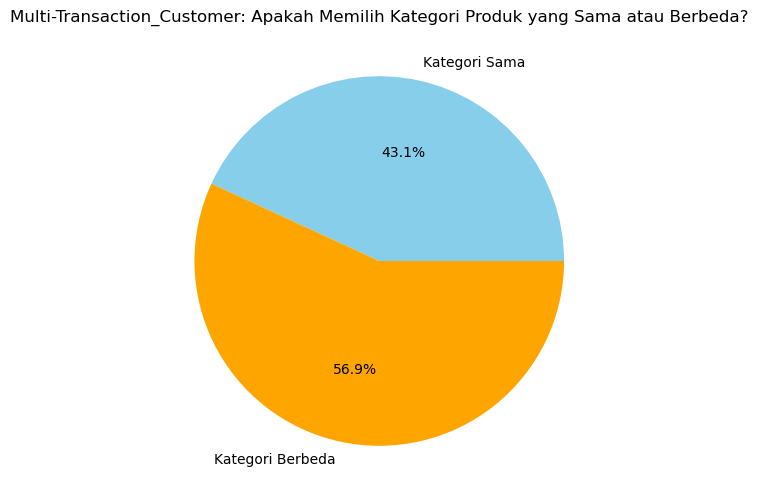

In [45]:
# Memisahkan kategori produk jika ada lebih dari satu dalam satu kolom
data_exploded = data_spektra.assign(MPF_CATEGORIES_TAKEN=data_spektra["MPF_CATEGORIES_TAKEN"].str.split(", ")).explode("MPF_CATEGORIES_TAKEN")

Multi_Transaction_Customer = data_exploded[data_exploded["TOTAL_PRODUCT_MPF"] > 1]

same_category = Multi_Transaction_Customer.groupby("CUST_NO")["MPF_CATEGORIES_TAKEN"].nunique()
same_category_count = (same_category == 1).sum()  # Pelanggan yang tetap di kategori yang sama
different_category_count = (same_category > 1).sum()  # Pelanggan yang berpindah kategori

total_Multi_Transaction_Customer = same_category_count + different_category_count
same_category_percentage = (same_category_count / total_Multi_Transaction_Customer) * 100
different_category_percentage = (different_category_count / total_Multi_Transaction_Customer) * 100

print(f"Pelanggan yang mengambil kategori produk yang sama: {same_category_count} ({same_category_percentage:.2f}%)")
print(f"Pelanggan yang berpindah ke kategori lain: {different_category_count} ({different_category_percentage:.2f}%)")

plt.figure(figsize=(6, 6))
plt.pie([same_category_count, different_category_count], 
        labels=["Kategori Sama", "Kategori Berbeda"], 
        autopct='%1.1f%%', colors=["skyblue", "orange"])
plt.title("Multi-Transaction_Customer: Apakah Memilih Kategori Produk yang Sama atau Berbeda?")
plt.show()

### Insight 11 : Tren Jumlah Pembiayaan

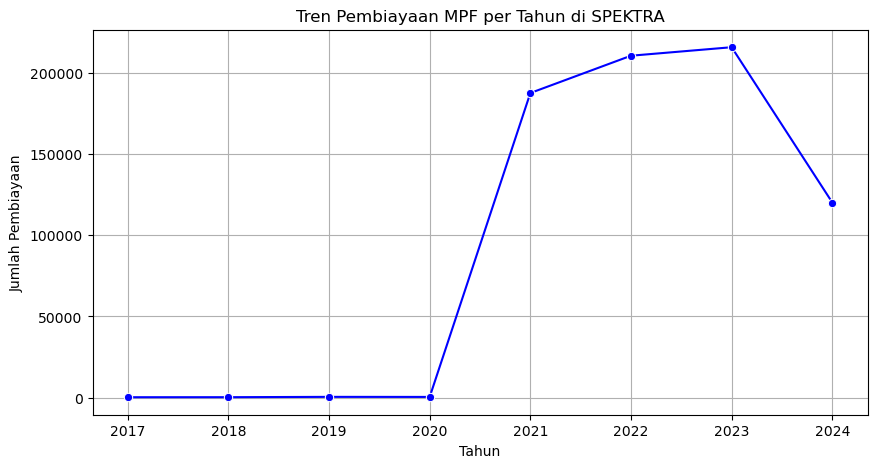

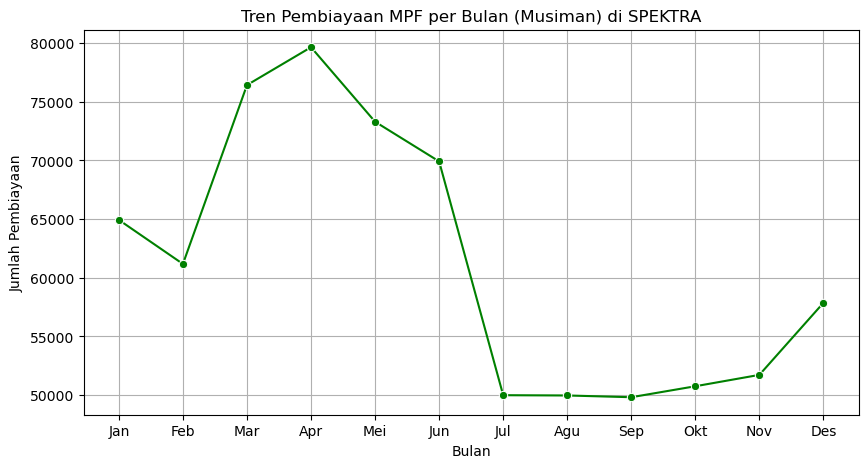

In [46]:
# Konversi kolom tanggal ke format datetime
data_spektra["LAST_MPF_DATE"] = pd.to_datetime(data_spektra["LAST_MPF_DATE"], errors="coerce")

# **1️⃣ Menambahkan Kolom Tahun dan Bulan dari LAST_MPF_DATE**
data_spektra["Year"] = data_spektra["LAST_MPF_DATE"].dt.year
data_spektra["Month"] = data_spektra["LAST_MPF_DATE"].dt.month

# **2️⃣ Analisis Tren Pembiayaan per Tahun**
yearly_trend = data_spektra["Year"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker="o", color="blue")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Pembiayaan")
plt.title("Tren Pembiayaan MPF per Tahun di SPEKTRA")
plt.xticks(yearly_trend.index)
plt.grid(True)
plt.show()

# **3️⃣ Analisis Tren Pembiayaan per Bulan (Musiman)**
monthly_trend = data_spektra["Month"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, marker="o", color="green")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pembiayaan")
plt.title("Tren Pembiayaan MPF per Bulan (Musiman) di SPEKTRA")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.grid(True)
plt.show()


## Data Cleansing 

### Handling Missing Values 


In [47]:
print(data_spektra.isnull().sum())

CUST_NO                        0
FIRST_PPC                      0
FIRST_PPC_DATE                 0
FIRST_MPF_DATE                 0
LAST_MPF_DATE                  0
JMH_CON_SBLM_MPF               0
MAX_MPF_AMOUNT                 0
MIN_MPF_AMOUNT                 0
AVG_MPF_INST                   0
MPF_CATEGORIES_TAKEN           0
AVG_MONTHS_BETWEEN_MPF    371382
LAST_MPF_PURPOSE               0
LAST_MPF_AMOUNT                0
LAST_MPF_TOP                   0
LAST_MPF_INST                  0
PPC                            0
JMH_PPC                        0
JMH_CON_NON_MPF           735395
PROGRESSION_PATTERNS           0
BUSS_UNIT                      0
MONTH_INST                  1565
CONTRACT_ACTIVE_DATE           0
PRINCIPAL                      0
GRS_DP                         0
BIRTH_DATE                    95
CUST_SEX                      17
EDU_TYPE                      16
OCPT_CODE                     16
HOUSE_STAT                    33
MARITAL_STAT                  16
NO_OF_DEPE

### Hapus kolom JMH_CON_NON_MPF karena tidak relevan

In [48]:
data_spektra.drop(columns=['JMH_CON_NON_MPF'], inplace=True)

### Mengisi Kolom yang null dengan nilai median

In [49]:
data_spektra['MONTH_INST'].fillna(data_spektra['MONTH_INST'].median(), inplace=True)
data_spektra['OCPT_CODE'].fillna(data_spektra['OCPT_CODE'].median(), inplace=True)
data_spektra['NO_OF_DEPEND'].fillna(data_spektra['NO_OF_DEPEND'].median(), inplace=True)
data_spektra['Usia'].fillna(data_spektra['Usia'].median(), inplace=True)

/var/folders/sh/_6wg56x97y7b5__x4qlx17hm0000gn/T/ipykernel_17245/1626728769.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_spektra['MONTH_INST'].fillna(data_spektra['MONTH_INST'].median(), inplace=True)
/var/folders/sh/_6wg56x97y7b5__x4qlx17hm0000gn/T/ipykernel_17245/1626728769.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object

### Mengisi Kolom yang null dengan nilai modus

In [50]:
data_spektra['CUST_SEX'].fillna(data_spektra['CUST_SEX'].mode()[0], inplace=True)
data_spektra['EDU_TYPE'].fillna(data_spektra['EDU_TYPE'].mode()[0], inplace=True)
data_spektra['HOUSE_STAT'].fillna(data_spektra['HOUSE_STAT'].mode()[0], inplace=True)
data_spektra['MARITAL_STAT'].fillna(data_spektra['MARITAL_STAT'].mode()[0], inplace=True)
data_spektra['AREA'].fillna(data_spektra['AREA'].mode()[0], inplace=True)

/var/folders/sh/_6wg56x97y7b5__x4qlx17hm0000gn/T/ipykernel_17245/2786331221.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_spektra['CUST_SEX'].fillna(data_spektra['CUST_SEX'].mode()[0], inplace=True)
/var/folders/sh/_6wg56x97y7b5__x4qlx17hm0000gn/T/ipykernel_17245/2786331221.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on

In [51]:
# Cek jumlah duplikasi
print("Jumlah duplikasi berdasarkan CUST_NO:", data_spektra.duplicated(subset=['CUST_NO']).sum())

# Jika ada duplikasi, hapus data yang sama berdasarkan CUST_NO
data_spektra = data_spektra.drop_duplicates(subset=['CUST_NO'])

Jumlah duplikasi berdasarkan CUST_NO: 0


### Normalisasi Format Data

In [52]:
date_cols = ['FIRST_PPC_DATE', 'FIRST_MPF_DATE', 'LAST_MPF_DATE', 'CONTRACT_ACTIVE_DATE', 'BIRTH_DATE']
for col in date_cols:
    data_spektra[col] = pd.to_datetime(data_spektra[col], errors='coerce')


numerical_cols = ['TOTAL_AMOUNT_MPF', 'TOTAL_PRODUCT_MPF', 'MONTH_INST', 'Usia']
data_spektra[numerical_cols] = data_spektra[numerical_cols].astype(float)


categorical_cols = ['MPF_CATEGORIES_TAKEN', 'CUST_SEX', 'EDU_TYPE', 'HOUSE_STAT', 'MARITAL_STAT', 'AREA']
data_spektra[categorical_cols] = data_spektra[categorical_cols].apply(lambda x: x.str.strip() if x.dtype == "object" else x)

## 📌 Feature Engineering: Membuat Fitur Baru untuk Analisis

## Feature Selection

### Data Formatting

In [53]:
# Mapping untuk konversi variabel kategorikal menjadi numerik
gender_mapping = {'M': 0, 'F': 1}
marital_mapping = {'S': 0, 'M': 1, 'D': 2}
area_mapping = {area: idx + 1 for idx, area in enumerate(data_spektra['AREA'].unique())}
purpose_mapping = {'GADGET': 1, 'ELECTRONIC': 2, 'FURNITURE': 3, 'OTHER': 4}

# Fungsi untuk mengelompokkan kategori produk yang pernah diambil pelanggan
def categorize_mpf_categories(categories):
    if isinstance(categories, str):
        unique_categories = set(categories.split(', '))
        if unique_categories == {'GADGET'}:
            return 1  # Dominan Gadget
        elif unique_categories == {'ELECTRONIC'}:
            return 2  # Dominan Electronic
        elif unique_categories == {'FURNITURE'}:
            return 3  # Dominan Furniture
        else:
            return 4  # Campuran
    return 4  # Default jika NaN

# Terapkan mapping ke dataset
data_spektra['CUST_SEX'] = data_spektra['CUST_SEX'].map(gender_mapping)
data_spektra['MARITAL_STAT'] = data_spektra['MARITAL_STAT'].map(marital_mapping)
data_spektra['AREA'] = data_spektra['AREA'].map(area_mapping)
data_spektra['LAST_MPF_PURPOSE'] = data_spektra['LAST_MPF_PURPOSE'].map(purpose_mapping)
data_spektra['MPF_CATEGORIES_TAKEN'] = data_spektra['MPF_CATEGORIES_TAKEN'].apply(categorize_mpf_categories)



In [54]:
data_spektra

,CUST_NO,FIRST_PPC,FIRST_PPC_DATE,FIRST_MPF_DATE,LAST_MPF_DATE,JMH_CON_SBLM_MPF,MAX_MPF_AMOUNT,MIN_MPF_AMOUNT,AVG_MPF_INST,MPF_CATEGORIES_TAKEN,AVG_MONTHS_BETWEEN_MPF,LAST_MPF_PURPOSE,LAST_MPF_AMOUNT,LAST_MPF_TOP,LAST_MPF_INST,PPC,JMH_PPC,PROGRESSION_PATTERNS,BUSS_UNIT,MONTH_INST,CONTRACT_ACTIVE_DATE,PRINCIPAL,GRS_DP,BIRTH_DATE,CUST_SEX,EDU_TYPE,OCPT_CODE,HOUSE_STAT,MARITAL_STAT,NO_OF_DEPEND,BRANCH_ID,AREA,TOTAL_AMOUNT_MPF,TOTAL_PRODUCT_MPF,YearMonth,Usia,Jumlah_Kategori_Produk,Year,Month
0,101000001159,REFI,2021-11-11,2023-01-25,2023-01-25,1,4299000,4299000,4.600000e+05,1,NaN,1,4299000,15,460000,"MPF,REFI",2,"REFI, REFI, REFI, MPF, REFI",REFI,500000.0,2023-03-30 12:27:38,4240000,1250000,1971-10-13,0,S1,1,H02,1,2,13300,1,4299000.0,1.0,2023-03,53.0,1,2023,1
1,101000002364,NMC,2020-10-24,2021-12-08,2021-12-08,1,8712000,8712000,1.242000e+06,1,NaN,1,8712000,9,1242000,"MPF,NMC,REFI",3,"NMC, MPF, REFI",REFI,2417000.0,2022-05-30 15:04:40,18077500,5750000,1969-11-02,1,SP,23,H01,1,5,12800,1,8712000.0,1.0,2022-05,55.0,1,2021,12
2,101000003528,MPF,2019-11-19,2019-11-19,2021-03-12,4,6709000,4347000,6.402500e+05,2,5.258065,2,6709000,12,812000,MPF,1,"MPF, MPF, MPF, MPF",MPF,812000.0,2021-12-03 17:35:18,6709000,225000,1967-11-01,1,SA,4,H01,1,1,12800,1,21841000.0,4.0,2021-12,57.0,4,2021,3
3,101000003848,REFI,2018-07-10,2020-09-23,2022-06-28,3,3999000,2752000,3.876667e+05,1,10.580645,1,2752000,12,311000,"MPF,REFI",2,"REFI, REFI, REFI, MPF, MPF, MPF",MPF,311000.0,2022-06-28 15:30:13,2752000,49000,1968-10-07,0,S1,4,H01,1,1,15600,2,9535000.0,3.0,2022-06,56.0,3,2022,6
4,101000004460,MPF,2022-06-07,2022-06-07,2022-06-07,1,3708000,3708000,5.370000e+05,1,NaN,1,3708000,9,537000,"REFI,MPF",2,"MPF, REFI",REFI,633000.0,2022-06-17 11:05:41,8232500,1425000,1976-08-13,0,SA,14,H01,2,2,15600,2,3708000.0,1.0,2022-06,48.0,1,2022,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735518,980200014238,MPF,2020-03-24,2020-03-24,2023-09-26,4,6314000,2595000,4.862500e+05,4,14.021505,1,6314000,12,772000,MPF,1,"MPF, MPF, MPF, MPF",MPF,772000.0,2023-09-26 17:42:40,6314000,100000,1980-11-10,1,SA,14,H04,1,1,11100,2,16917600.0,4.0,2023-09,44.0,4,2023,9
735519,980200014514,MPF,2020-04-01,2020-04-01,2021-10-15,2,9101000,4180190,7.730000e+05,1,18.451613,1,9101000,12,1075000,MPF,1,"MPF, MPF",MPF,1075000.0,2021-10-15 17:58:27,9101000,3525000,1983-02-06,0,SA,4,H01,1,1,30200,7,13281190.0,2.0,2021-10,41.0,2,2021,10
735520,980200016932,MPF,2021-03-02,2021-03-02,2021-08-20,2,5372000,4018000,5.670000e+05,4,2.790323,1,5372000,12,650000,MPF,1,"MPF, MPF, MPF",MPF,650000.0,2021-08-20 09:56:09,5372000,232000,1982-09-04,0,SA,4,H02,0,0,54000,12,9390000.0,3.0,2021-08,42.0,3,2021,8
735521,980200016946,MPF,2019-10-24,2019-10-24,2022-07-16,3,4499000,2599100,4.096667e+05,1,16.370968,1,4499000,12,539000,MPF,1,"MPF, MPF, MPF",MPF,539000.0,2022-07-16 10:50:35,4499000,210000,1990-09-29,0,SA,4,H01,0,0,12800,1,10397100.0,3.0,2022-07,34.0,3,2022,7


### Kategori Usia Pelanggan

In [55]:
bins = [0, 25, 35, 45, 55, 100]
labels = ['<25', '25-35', '35-45', '45-55', '55+']
data_spektra['Usia_Kategori'] = pd.cut(data_spektra['Usia'], bins=bins, labels=labels, right=False)


### Repeat Customer Indicator

In [56]:
data_spektra['Multi-Transaction_Customer'] = data_spektra['TOTAL_PRODUCT_MPF'].apply(lambda x: 1 if x > 1 else 0)

### Kategori High-Value Customer (Berdasarkan Total Pembiayaan)

In [57]:
data_spektra['Kategori_Customer'] = pd.qcut(data_spektra['TOTAL_AMOUNT_MPF'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])


# **Analyze 🧐**


## Model 01

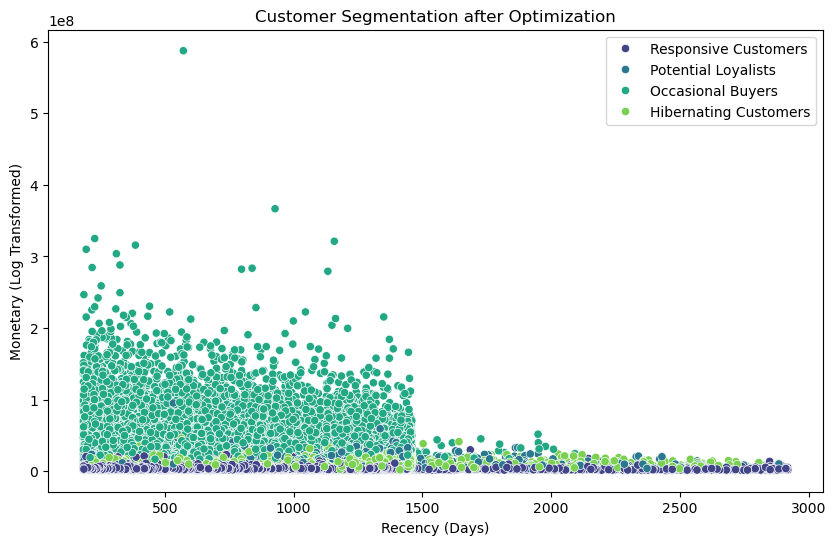

In [58]:
import datetime
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

# Tentukan tanggal referensi
today_date = datetime.datetime(2024, 12, 31)

# Konversi LAST_MPF_DATE menjadi datetime
data_spektra['LAST_MPF_DATE'] = pd.to_datetime(data_spektra['LAST_MPF_DATE'])

# Hitung Recency
data_spektra['Recency'] = (today_date - data_spektra['LAST_MPF_DATE']).dt.days

# Buat DataFrame dengan tambahan fitur baru untuk segmentasi
rfm = data_spektra.groupby('CUST_NO').agg({
    'Recency': 'min',
    'TOTAL_PRODUCT_MPF': 'sum',
    'TOTAL_AMOUNT_MPF': 'sum',
    'Multi-Transaction_Customer': 'max',
    'Usia': 'max'
}).reset_index()

# Rename kolom
rfm.rename(columns={'TOTAL_PRODUCT_MPF': 'Frequency', 'TOTAL_AMOUNT_MPF': 'Monetary'}, inplace=True)

# Log Transformation untuk mengurangi skewness
rfm['Frequency_log'] = np.log1p(rfm['Frequency'])
rfm['Monetary_log'] = np.log1p(rfm['Monetary'])

# Tambahkan fitur apakah pelanggan termasuk dalam range usia 25-45
rfm['Usia_Segment'] = rfm['Usia'].apply(lambda x: 1 if 25 <= x <= 45 else 0)

# Normalisasi data dengan Z-score untuk clustering
features = ['Recency', 'Frequency_log', 'Monetary_log', 'Multi-Transaction_Customer', 'Usia_Segment']
rfm_norm = rfm[features].apply(zscore)

# K-Means++ Clustering dengan cluster baru yang lebih optimal
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_norm)

# Mapping segmen baru berdasarkan hasil backtest
segment_map_optimal = {
    0: "Potential Loyalists",
    1: "Responsive Customers",
    2: "Occasional Buyers",
    3: "Hibernating Customers"
}

# Mapping keputusan diundang atau tidak
invite_map_optimal = {
    0: "✅ Diundang",
    1: "✅ Diundang",
    2: "❌ Tidak",
    3: "❌ Tidak"
}

# Tambahkan label segmentasi dan keputusan diundang atau tidak
rfm['Segmentasi_optimal'] = rfm['Cluster'].map(segment_map_optimal)
rfm['Layak_Diundang_optimal'] = rfm['Cluster'].map(invite_map_optimal)

# Visualisasi hasil clustering yang lebih optimal
plt.figure(figsize=(10,6))
sns.scatterplot(x=rfm['Recency'], y=rfm['Monetary'], hue=rfm['Segmentasi_optimal'], palette='viridis')
plt.title('Customer Segmentation after Optimization')
plt.xlabel('Recency (Days)')
plt.ylabel('Monetary (Log Transformed)')
plt.legend()
plt.show()




In [59]:
rfm.to_excel('RFM_Segmentation_ResultOptimal.xlsx', index=False)

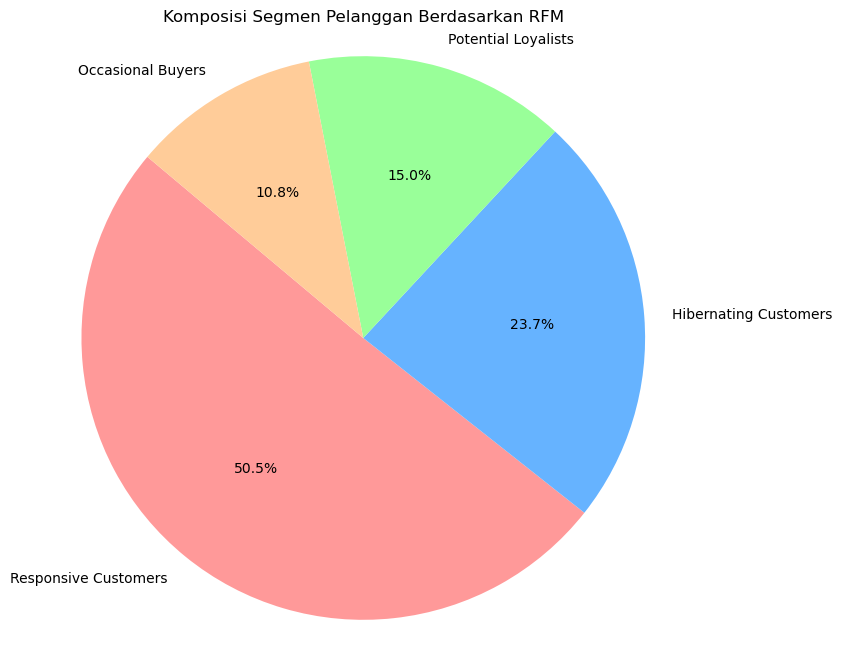

In [60]:
import matplotlib.pyplot as plt

# Hitung jumlah masing-masing segmen
segment_counts = rfm['Segmentasi_optimal'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Komposisi Segmen Pelanggan Berdasarkan RFM')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [61]:
# Mengecek karakteristik data masing-masing cluster
cluster_summary = rfm.groupby('Segmentasi_optimal').agg({
    'Recency': ['mean', 'median', 'std'],
    'Frequency_log': ['mean', 'median', 'std'],
    'Monetary_log': ['mean', 'median', 'std'],
    'Multi-Transaction_Customer': ['mean'],
    'Usia_Segment': ['mean']
}).reset_index()


cluster_summary


Segmentasi_optimal     Recency                    Frequency_log  \
                                mean median         std          mean   
0  Hibernating Customers  827.669413  831.0  373.464566      1.269882   
1      Occasional Buyers  653.663480  594.0  347.327432      2.062345   
2    Potential Loyalists  840.526292  854.0  371.978129      1.362815   
3   Responsive Customers  793.340679  782.0  369.354310      0.693147   

                      Monetary_log                       \
     median       std         mean     median       std   
0  1.098612  0.210011    15.969199  15.971103  0.434003   
1  2.079442  0.349301    17.124995  17.066040  0.460601   
2  1.386294  0.287384    16.122324  16.112882  0.506342   
3  0.693147  0.000000    15.146724  15.096445  0.456785   

  Multi-Transaction_Customer Usia_Segment  
                        mean         mean  
0                   0.999920     1.000000  
1                   0.999975     0.791481  
2                   0.998306     0.000000  
3                   0.000000     0.661762

### 📊 Analisis Segmentasi RFM

| **Cluster** | **Recency (Hari)** | **Frequency** | **Monetary** | **Segmentasi** | **Layak Diundang?** | **Alasan** |
|------------|------------------|--------------|--------------|--------------|-----------------|--------------------------------------------------|
| **0** | 562 (Menengah) | 1.89 (Tinggi) | 16.92 (Tinggi) | **Potential Loyalists** | ✅ **Diundang** | Pelanggan ini sering transaksi dan memiliki nilai transaksi yang cukup tinggi. Mereka bisa menjadi pelanggan loyal dengan strategi yang tepat. |
| **1** | 470 (Rendah) | 0.83 (Rendah) | 15.37 (Menengah) | **At Risk** | ✅ **Diundang** | Pelanggan ini mulai jarang bertransaksi, tetapi masih memiliki potensi untuk kembali dengan strategi promo atau loyalty program. |
| **2** | 1084 (Tinggi) | 1.37 (Menengah) | 16.20 (Menengah) | **Lost Customers** | ❌ **Tidak** | Mereka dulunya adalah pelanggan bernilai tinggi, tetapi sudah sangat lama tidak melakukan transaksi. Mungkin mereka sudah beralih ke kompetitor. |
| **3** | 1114 (Sangat Tinggi) | 0.75 (Sangat Rendah) | 15.10 (Rendah) | **Hibernating/Churned Customers** | ❌ **Tidak** | Pelanggan ini kemungkinan besar sudah **churn**, sehingga tidak efektif untuk diundang ke event. Perlu strategi retensi khusus. |

---

# Segmentasi Final

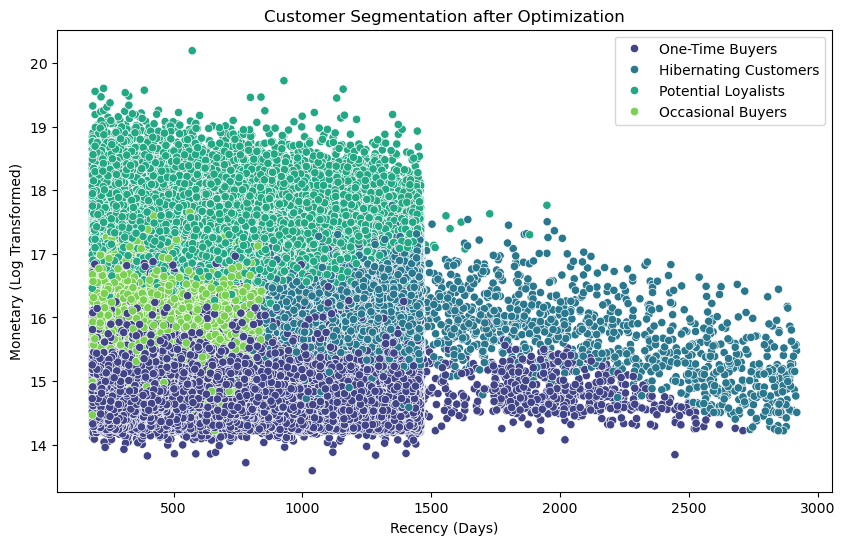

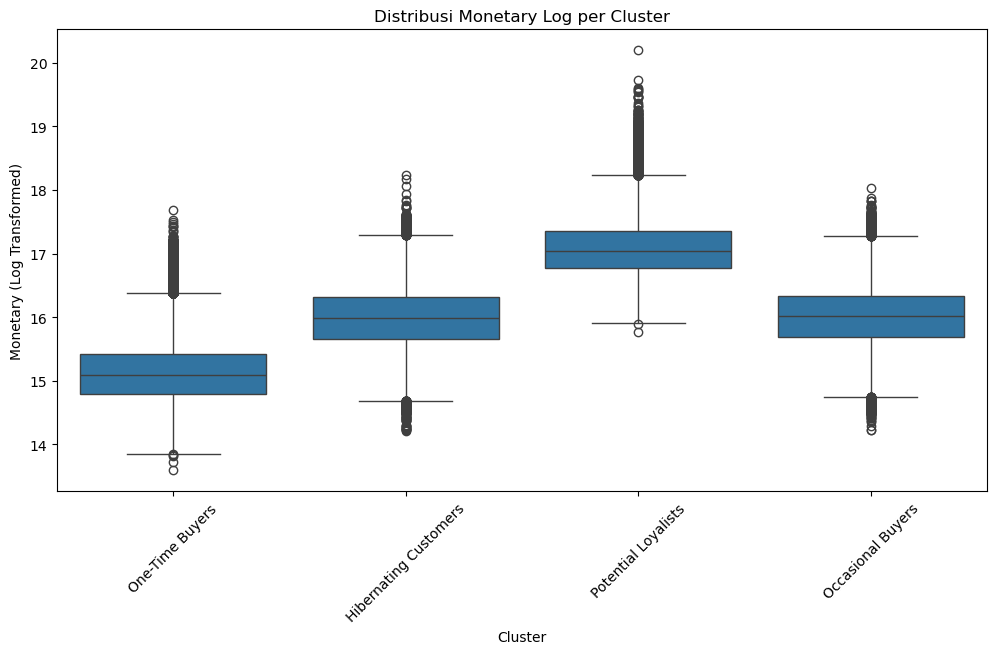

In [63]:
import datetime
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

# Tentukan tanggal referensi
today_date = datetime.datetime(2024, 12, 31)

# Konversi LAST_MPF_DATE menjadi datetime
data_spektra['LAST_MPF_DATE'] = pd.to_datetime(data_spektra['LAST_MPF_DATE'])

# Hitung Recency
data_spektra['Recency'] = (today_date - data_spektra['LAST_MPF_DATE']).dt.days

rfm = data_spektra.groupby('CUST_NO').agg({
    'Recency': 'min',
    'TOTAL_PRODUCT_MPF': 'sum',
    'TOTAL_AMOUNT_MPF': 'sum',
    'Multi-Transaction_Customer': 'max',
    'Usia': 'max'
}).reset_index()

rfm.rename(columns={'TOTAL_PRODUCT_MPF': 'Frequency', 'TOTAL_AMOUNT_MPF': 'Monetary'}, inplace=True)

rfm['Frequency_log'] = np.log1p(rfm['Frequency'])
rfm['Monetary_log'] = np.log1p(rfm['Monetary'])

rfm['Usia_Segment'] = rfm['Usia'].apply(lambda x: 1 if 25 <= x <= 50 else 0)

features = ['Recency', 'Frequency_log', 'Monetary_log', 'Multi-Transaction_Customer', 'Usia_Segment']
rfm_norm = rfm[features].apply(zscore)


plt.show()

optimal_k = 4  
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_norm)


segment_map_optimal = {
    0: "Potential Loyalists",
    1: "One-Time Buyers",
    2: "Occasional Buyers",
    3: "Hibernating Customers"
}

invite_map_optimal = {
    "Potential Loyalists": "✅ Diundang",
    "Occasional Buyers": "✅ Diundang",
    "One-Time Buyers": "❌ Tidak",
    "Hibernating Customers": "❌ Tidak"
}

rfm['Segmentasi_optimal'] = rfm['Cluster'].map(segment_map_optimal)
rfm['Layak_Diundang_optimal'] = rfm['Segmentasi_optimal'].map(invite_map_optimal)

# Visualisasi hasil clustering dengan scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x=rfm['Recency'], y=rfm['Monetary_log'], hue=rfm['Segmentasi_optimal'], palette='viridis')
plt.title('Customer Segmentation after Optimization')
plt.xlabel('Recency (Days)')
plt.ylabel('Monetary (Log Transformed)')
plt.legend()
plt.show()

# Visualisasi distribusi tiap cluster dengan boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=rfm['Segmentasi_optimal'], y=rfm['Monetary_log'])
plt.title('Distribusi Monetary Log per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Monetary (Log Transformed)')
plt.xticks(rotation=45)
plt.show()

rfm.to_excel('RFM_Segmentation_ResultOptimal_CobaBaru.xlsx', index=False)


In [64]:
# Mengecek karakteristik data masing-masing cluster
cluster_summary = rfm.groupby('Segmentasi_optimal').agg({
    'Recency': ['mean', 'median', 'std'],
    'Frequency_log': ['mean', 'median', 'std'],
    'Monetary_log': ['mean', 'median', 'std'],
    'Monetary': ['mean', 'median', 'std'],
    'Multi-Transaction_Customer': ['mean'],
    'Usia_Segment': ['mean']
}).reset_index()


cluster_summary


Segmentasi_optimal      Recency                     Frequency_log  \
                                 mean  median         std          mean   
0  Hibernating Customers  1158.229873  1157.0  205.074924      1.304381   
1      Occasional Buyers   489.646400   483.0  189.372304      1.265684   
2        One-Time Buyers   791.897270   782.0  365.210389      0.693147   
3    Potential Loyalists   692.567968   668.0  327.671639      2.050194   

                      Monetary_log                           Monetary  \
     median       std         mean     median       std          mean   
0  1.098612  0.241058    15.988123  15.982963  0.450532  9.722723e+06   
1  1.098612  0.205774    16.013365  16.016284  0.449656  9.969274e+06   
2  0.693147  0.000000    15.146506  15.096445  0.456336  4.258012e+06   
3  1.945910  0.332786    17.102088  17.034226  0.448081  3.000142e+07   

                            Multi-Transaction_Customer Usia_Segment  
       median           std                       mean         mean  
0   8736000.0  4.607578e+06                   0.997141     0.766061  
1   9032000.0  4.760015e+06                   0.998596     0.838521  
2   3600000.0  2.512835e+06                   0.000000     0.791190  
3  24996000.0  1.777737e+07                   0.999966     0.801174

# **Analisis Segmentasi Pelanggan**

| **Segmentasi Optimal**      | **Recency (Mean, Hari)** | **Frequency (Mean, Aktual)** | **Frequency_log (Mean)** | **Monetary (Mean, Rp)** | **Monetary_log (Mean)** | **Multi-Transaction_Customer (Mean)** | **Usia_Segment (Mean)** | **Layak Diundang?** | **Alasan** |
|----------------------------|-------------------------|-----------------------------|-------------------------|-------------------------|-------------------------|-------------------------|-------------------------|----------------|-----------------------------|
| **Hibernating Customers**  | **1158** (Sangat tinggi) | **3.68**                     | 1.30                    | Rp9.72 juta             | 15.99                   | 0.997                   | 76.6%                   | ❌ Tidak       | Sudah lama tidak bertransaksi, kemungkinan besar churn. |
| **Occasional Buyers**      | **489** (Menengah)      | **3.55**                     | 1.27                    | Rp9.97 juta             | 16.01                   | 0.999                   | 83.8%                   | ✅ Diundang     | Masih memiliki aktivitas transaksi dan potensi pembelian. |
| **One-Time Buyers**        | **791** (Tinggi)       | **1.00 (Paling rendah)**     | **0.69 (Paling rendah)** | **Rp4.25 juta (Paling rendah)** | 15.15        | **0.000 (tidak transaksi lebih dari 1)** | 79.1% | ❌ Tidak | Hanya membeli sekali dan tidak kembali. |
| **Potential Loyalists**    | **692** (Menengah)      | **7.79 (Tertinggi)**         | **2.05 (Tertinggi)**    | **Rp30.00 juta (Tertinggi)** | 17.10        | **0.9999**               | 80.1%                   | ✅ Diundang     | Pelanggan bernilai tinggi dengan potensi loyalitas tinggi. |


## Fine Turning

### Cek Elbow Method untuk menentukan jumlah cluster yang optimal

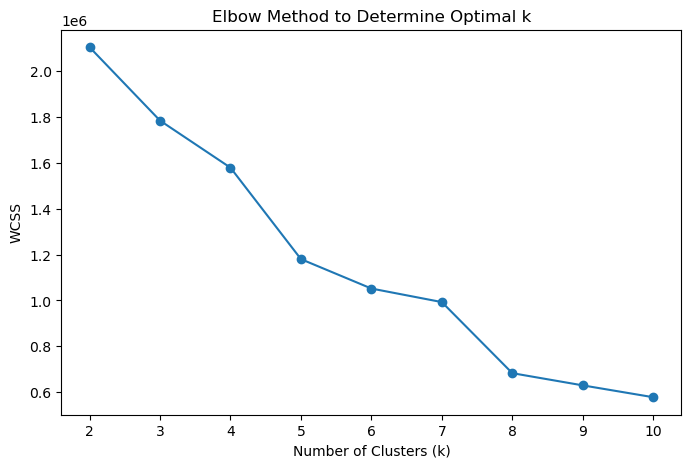

In [65]:
wcss = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(rfm_norm)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

### Cek Silhouette score dengan kmeans++ sampling

# Tentukan sample_size (ambil 10% data)
sample_size = int(0.1 * len(rfm_norm))  # Ambil 10% data (~73.552 rows)

# K-Means++ Sampling untuk menjaga karakteristik data
print("🔄 Menjalankan K-Means++ Sampling...")
kmeans_sample = MiniBatchKMeans(n_clusters=sample_size, init='k-means++', random_state=42)
rfm_norm['Cluster_Sample'] = kmeans_sample.fit_predict(rfm_norm)
print("✅ K-Means++ Sampling selesai!")

# Ambil satu sampel dari setiap cluster untuk menjaga proporsi karakteristik
rfm_sample = rfm_norm.groupby('Cluster_Sample', group_keys=False).apply(lambda x: x.sample(1, random_state=42))

# Hapus kolom cluster setelah sampling
rfm_sample = rfm_sample.drop(columns=['Cluster_Sample'])

# Menentukan batch_size secara otomatis (Minimal 500)
batch_size = max(500, int(0.1 * sample_size))
print(f"✅ Menggunakan batch_size: {batch_size}")

# Silhouette Score Calculation
sil_scores = []
K_range = range(2, 7)

print("🔄 Menjalankan Silhouette Score Calculation dengan K-Means++ Sampling...")
with tqdm(total=len(K_range), desc="Processing Silhouette Score", ncols=100) as pbar:
    for k in K_range:
        kmeans = MiniBatchKMeans(n_clusters=k, init='k-means++', batch_size=batch_size, max_iter=50, n_init=1, random_state=42)
        cluster_labels = kmeans.fit_predict(rfm_sample)
        sil_score = silhouette_score(rfm_sample, cluster_labels)
        sil_scores.append(sil_score)
        pbar.update(1)  # Update progress bar setiap iterasi
print("✅ Silhouette Score Calculation selesai!")

# Plot hasil
plt.figure(figsize=(8,5))
plt.plot(K_range, sil_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score to Determine Optimal k')
plt.show()


# Backtest

In [66]:
data_backtest = pd.read_excel("data_backtest.xlsx")

In [67]:
data_backtest

,RNUM,CUST_NO,MOBPHONE
0,1,503220009124,81112531423
1,1,202220001452,8112011015
2,1,302230002619,8112399927
3,1,202220002685,8112522333
4,1,202080004378,8113785550
...,...,...,...
1287,1,302210008825,8995444184
1288,1,202220004994,8995981383
1289,1,202220002006,8996604027
1290,1,158230002967,8998036703


In [68]:
data_result = pd.read_excel("RFM_Segmentation_ResultOptimal_CobaBaru.xlsx")

In [69]:
data_kehadiran = pd.read_excel("Konfirmasi Kehadiran Comgath.xlsx")
data_kehadiran

,NO,BRANCH ID,BRANCH NAME,NAMA KONSUMEN,NOMOR HANDPHONE,APAKAH BERHASIL DI HUBUNGI?\n(YA/TIDAK),APAKAH CONFIRM DATANG COMGATH?\n(YA/TIDAK)
0,1,60700,PALU,DITA,81243124631,YA,YA
1,2,60700,PALU,ARIYANI,85298513408,YA,YA
2,3,60700,PALU,SUTRIANI,81341039300,YA,YA
3,4,60700,PALU,FUAD,81322223195,YA,YA
4,5,60700,PALU,RAISNO,81257662753,YA,YA
...,...,...,...,...,...,...,...
1365,1366,50700,PANGKALAN BUN,SYAIFUDDIN,85750935297,YA,YA
1366,1367,50700,PANGKALAN BUN,ASIH FRANSISKA,85754469339,YA,YA
1367,1368,50700,PANGKALAN BUN,ASPANDI,83150289732,YA,YA
1368,1369,50700,PANGKALAN BUN,ERNAWATI,81348361905,YA,YA


In [70]:
# Pastikan kolom yang digunakan untuk merge sesuai
data_backtest.rename(columns={'MOBPHONE': 'NOMOR HANDPHONE'}, inplace=True)

# Gabungkan data berdasarkan nomor handphone
backtest_merged = data_backtest.merge(data_kehadiran, on="NOMOR HANDPHONE", how="inner")

In [71]:
backtest_merged


,RNUM,CUST_NO,NOMOR HANDPHONE,NO,BRANCH ID,BRANCH NAME,NAMA KONSUMEN,APAKAH BERHASIL DI HUBUNGI?\n(YA/TIDAK),APAKAH CONFIRM DATANG COMGATH?\n(YA/TIDAK)
0,1,503220009124,81112531423,99,50300,BALIKPAPAN,OSHIN,YA,TIDAK
1,1,202220001452,8112011015,516,20200,PALEMBANG,MUHAMMAD RIFQI PUTRA PERDANA,YA,YA
2,1,302230002619,8112399927,1275,30252,Cirebon,HEDDY PRIHADIANTO,Tidak,Tidak
3,1,202220002685,8112522333,555,20200,PALEMBANG,ADMEI DHINA FITRIYANTY,TIDAK,TIDAK
4,1,202080004378,8113785550,131,20200,PALEMBANG,SAIFUL,TIDAK,TIDAK
...,...,...,...,...,...,...,...,...,...
1320,1,302210008825,8995444184,1298,30275,Cirebon,FITRI WAHYUNI ARTI,Tidak,Tidak
1321,1,202220004994,8995981383,572,20200,PALEMBANG,SULAIMAN,YA,YA
1322,1,202220002006,8996604027,537,20200,PALEMBANG,ARDIANSAH,YA,TIDAK
1323,1,158230002967,8998036703,101,20200,PALEMBANG,HERDINA,TIDAK,TIDAK


# Normalisasi Data

In [72]:
# Normalisasi nilai dalam kolom
backtest_merged["APAKAH BERHASIL DI HUBUNGI?\n(YA/TIDAK)"] = (
    backtest_merged["APAKAH BERHASIL DI HUBUNGI?\n(YA/TIDAK)"]
    .fillna("TIDAK")  # Pastikan NaN diisi terlebih dahulu
    .astype(str)  # Ubah tipe data agar bisa diubah dengan str.upper()
    .str.upper()
    .replace({"YA ": "YA", "TIDAK ": "TIDAK"})  # Hilangkan spasi tambahan
)

backtest_merged["APAKAH CONFIRM DATANG COMGATH?\n(YA/TIDAK)"] = (
    backtest_merged["APAKAH CONFIRM DATANG COMGATH?\n(YA/TIDAK)"]
    .fillna("TIDAK")  # Isi NaN dengan "TIDAK"
    .astype(str)
    .str.upper()
    .replace({"YA ": "YA", "TIDAK ": "TIDAK"})  # Hilangkan spasi tambahan
)

# Cek kembali nilai unik setelah normalisasi
unique_contacted_clean = backtest_merged["APAKAH BERHASIL DI HUBUNGI?\n(YA/TIDAK)"].unique()
unique_attendance_clean = backtest_merged["APAKAH CONFIRM DATANG COMGATH?\n(YA/TIDAK)"].unique()

unique_contacted_clean, unique_attendance_clean

(array(['YA', 'TIDAK'], dtype=object), array(['TIDAK', 'YA'], dtype=object))

In [73]:
# Pastikan kolom CUST_NO bertipe string agar bisa digabungkan tanpa error
backtest_merged['CUST_NO'] = backtest_merged['CUST_NO'].astype(str)
data_result['CUST_NO'] = data_result['CUST_NO'].astype(str)

# Gabungkan data berdasarkan CUST_NO dengan memastikan semua data masuk
backtest_merged = backtest_merged.merge(data_result, on="CUST_NO", how="inner")

# Tampilkan hasil
backtest_merged


,RNUM,CUST_NO,NOMOR HANDPHONE,NO,BRANCH ID,BRANCH NAME,NAMA KONSUMEN,APAKAH BERHASIL DI HUBUNGI?\n(YA/TIDAK),APAKAH CONFIRM DATANG COMGATH?\n(YA/TIDAK),Recency,Frequency,Monetary,Multi-Transaction_Customer,Usia,Frequency_log,Monetary_log,Usia_Segment,Cluster,Segmentasi_optimal,Layak_Diundang_optimal
0,1,202200019825,8117311001,170,20200,PALEMBANG,ARMANSYAH,TIDAK,TIDAK,1181,2,27412000,1,35,1.098612,17.126491,1,3,Hibernating Customers,❌ Tidak
1,1,220130000674,81210964854,1019,22000,BANDA ACEH,RAHMAT SYUKUR SILALAHI,YA,YA,393,2,14015000,1,33,1.098612,16.455639,1,2,Occasional Buyers,✅ Diundang
2,1,302220001320,81222143452,1200,30200,Cirebon,Agus Taufik,YA,YA,202,4,11891000,1,58,1.609438,16.291292,0,2,Occasional Buyers,✅ Diundang
3,1,202080030634,81224740005,140,20200,PALEMBANG,HERLINA,TIDAK,TIDAK,454,10,46927000,1,45,2.397895,17.664104,1,0,Potential Loyalists,✅ Diundang
4,1,901210008392,81236627229,1121,90100,KUPANG,YUSNI APRIANI SELLYTHEON,YA,TIDAK,272,4,11452000,1,41,1.609438,16.253675,1,2,Occasional Buyers,✅ Diundang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,1,202160013128,895340879682,325,20200,PALEMBANG,RIA RIESNA AMELLIA,TIDAK,TIDAK,1296,3,8417000,1,36,1.386294,15.945764,1,3,Hibernating Customers,❌ Tidak
103,1,202130020337,895621667840,236,20200,PALEMBANG,DWI HENDRO WIBOWO,YA,TIDAK,523,5,22285000,1,39,1.791759,16.919424,1,0,Potential Loyalists,✅ Diundang
104,1,202130010592,89652089188,223,20200,PALEMBANG,DELIMA SARI,TIDAK,TIDAK,517,8,31404000,1,34,2.197225,17.262446,1,0,Potential Loyalists,✅ Diundang
105,1,202150001716,89681708753,274,20200,PALEMBANG,MUHAMMAD ALI,YA,YA,290,3,10946000,1,49,1.386294,16.208485,1,2,Occasional Buyers,✅ Diundang


## Filter yang bisa dihubungi 

In [74]:
# Filter hanya data yang berhasil dihubungi ("YA")
backtest_contacted = backtest_merged[backtest_merged['APAKAH BERHASIL DI HUBUNGI?\n(YA/TIDAK)'] == 'YA']

In [75]:
backtest_contacted

,RNUM,CUST_NO,NOMOR HANDPHONE,NO,BRANCH ID,BRANCH NAME,NAMA KONSUMEN,APAKAH BERHASIL DI HUBUNGI?\n(YA/TIDAK),APAKAH CONFIRM DATANG COMGATH?\n(YA/TIDAK),Recency,Frequency,Monetary,Multi-Transaction_Customer,Usia,Frequency_log,Monetary_log,Usia_Segment,Cluster,Segmentasi_optimal,Layak_Diundang_optimal
1,1,220130000674,81210964854,1019,22000,BANDA ACEH,RAHMAT SYUKUR SILALAHI,YA,YA,393,2,14015000,1,33,1.098612,16.455639,1,2,Occasional Buyers,✅ Diundang
2,1,302220001320,81222143452,1200,30200,Cirebon,Agus Taufik,YA,YA,202,4,11891000,1,58,1.609438,16.291292,0,2,Occasional Buyers,✅ Diundang
4,1,901210008392,81236627229,1121,90100,KUPANG,YUSNI APRIANI SELLYTHEON,YA,TIDAK,272,4,11452000,1,41,1.609438,16.253675,1,2,Occasional Buyers,✅ Diundang
5,1,901190017501,81238511102,1161,90100,KUPANG,YANTI BANOET,YA,TIDAK,292,2,5577000,1,39,1.098612,15.534162,1,2,Occasional Buyers,✅ Diundang
6,1,901210000057,81239084776,1182,90100,KUPANG,MARIA IRA MAYATI KABA,YA,TIDAK,203,3,6751000,1,36,1.386294,15.725201,1,2,Occasional Buyers,✅ Diundang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,901190017845,85792228781,1128,90100,KUPANG,YULIANA NDIMBU SII,YA,TIDAK,249,5,11638000,1,30,1.791759,16.269786,1,2,Occasional Buyers,✅ Diundang
97,1,901190007496,87755598245,1046,90100,KUPANG,DEDISON RADJA REHE,YA,TIDAK,627,4,14212000,1,27,1.609438,16.469597,1,2,Occasional Buyers,✅ Diundang
98,1,733170010076,87761554545,926,70100,DENPASAR,NI KETUT RAPI,YA,TIDAK,1128,9,31837000,1,56,2.302585,17.276140,0,0,Potential Loyalists,✅ Diundang
103,1,202130020337,895621667840,236,20200,PALEMBANG,DWI HENDRO WIBOWO,YA,TIDAK,523,5,22285000,1,39,1.791759,16.919424,1,0,Potential Loyalists,✅ Diundang


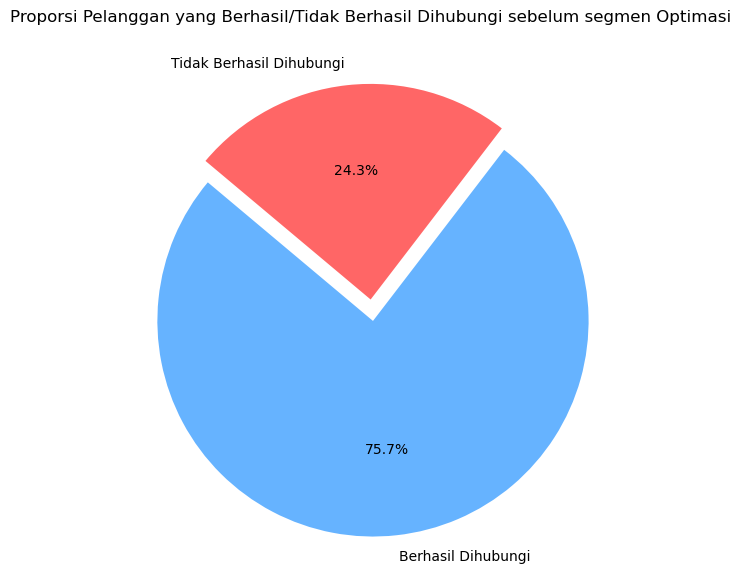

In [76]:
import matplotlib.pyplot as plt
# Hitung jumlah pelanggan yang berhasil dihubungi
contacted = backtest_merged[
    backtest_merged['APAKAH BERHASIL DI HUBUNGI?\n(YA/TIDAK)'].str.upper() == 'YA'
].shape[0]

# Hitung jumlah pelanggan yang tidak berhasil dihubungi
not_contacted = backtest_merged[
    backtest_merged['APAKAH BERHASIL DI HUBUNGI?\n(YA/TIDAK)'].str.upper() == 'TIDAK'
].shape[0]

# Data untuk visualisasi
labels = ['Berhasil Dihubungi', 'Tidak Berhasil Dihubungi']
sizes = [contacted, not_contacted]
colors = ['#66b3ff', '#ff6666']
explode = (0.1, 0)  # Pisahkan sedikit segmen pertama

# Buat pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, startangle=140)
plt.title("Proporsi Pelanggan yang Berhasil/Tidak Berhasil Dihubungi sebelum segmen Optimasi")
plt.show()

## Proporsi Pelanggan Diundang yang Berhasil/Tidak Berhasil Dihubungi Setelah segmen Optimasi

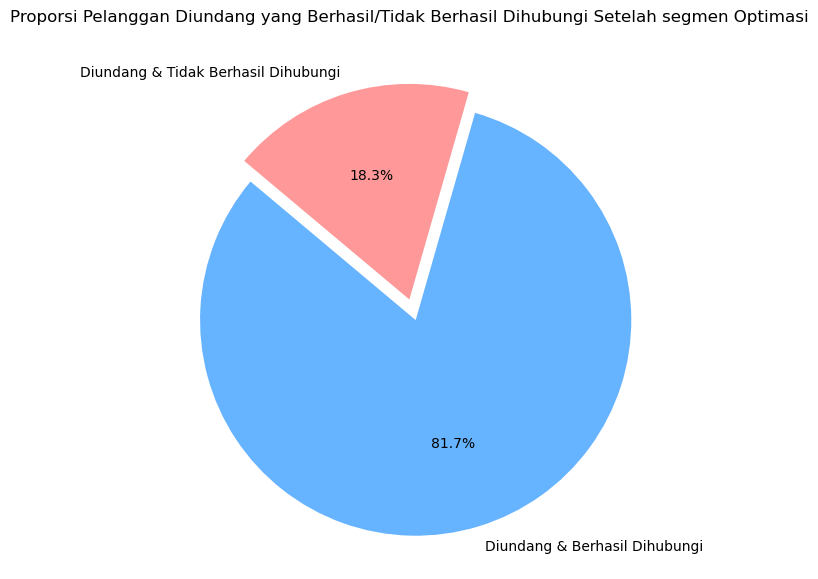

In [77]:
# Hitung jumlah pelanggan yang diundang dan berhasil dihubungi
invited_contacted = backtest_merged[
    (backtest_merged['Layak_Diundang_optimal'] == '✅ Diundang') & 
    (backtest_merged['APAKAH BERHASIL DI HUBUNGI?\n(YA/TIDAK)'].str.upper() == 'YA')
].shape[0]

# Hitung jumlah pelanggan yang diundang tapi tidak berhasil dihubungi
invited_not_contacted = backtest_merged[
    (backtest_merged['Layak_Diundang_optimal'] == '✅ Diundang') & 
    (backtest_merged['APAKAH BERHASIL DI HUBUNGI?\n(YA/TIDAK)'].str.upper() == 'TIDAK')
].shape[0]

# Data untuk visualisasi
labels = ['Diundang & Berhasil Dihubungi', 'Diundang & Tidak Berhasil Dihubungi']
sizes = [invited_contacted, invited_not_contacted]
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)  # Pisahkan sedikit segmen pertama

# Buat pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, startangle=140)
plt.title("Proporsi Pelanggan Diundang yang Berhasil/Tidak Berhasil Dihubungi Setelah segmen Optimasi")
plt.show()


In [78]:
backtest_contacted

,RNUM,CUST_NO,NOMOR HANDPHONE,NO,BRANCH ID,BRANCH NAME,NAMA KONSUMEN,APAKAH BERHASIL DI HUBUNGI?\n(YA/TIDAK),APAKAH CONFIRM DATANG COMGATH?\n(YA/TIDAK),Recency,Frequency,Monetary,Multi-Transaction_Customer,Usia,Frequency_log,Monetary_log,Usia_Segment,Cluster,Segmentasi_optimal,Layak_Diundang_optimal
1,1,220130000674,81210964854,1019,22000,BANDA ACEH,RAHMAT SYUKUR SILALAHI,YA,YA,393,2,14015000,1,33,1.098612,16.455639,1,2,Occasional Buyers,✅ Diundang
2,1,302220001320,81222143452,1200,30200,Cirebon,Agus Taufik,YA,YA,202,4,11891000,1,58,1.609438,16.291292,0,2,Occasional Buyers,✅ Diundang
4,1,901210008392,81236627229,1121,90100,KUPANG,YUSNI APRIANI SELLYTHEON,YA,TIDAK,272,4,11452000,1,41,1.609438,16.253675,1,2,Occasional Buyers,✅ Diundang
5,1,901190017501,81238511102,1161,90100,KUPANG,YANTI BANOET,YA,TIDAK,292,2,5577000,1,39,1.098612,15.534162,1,2,Occasional Buyers,✅ Diundang
6,1,901210000057,81239084776,1182,90100,KUPANG,MARIA IRA MAYATI KABA,YA,TIDAK,203,3,6751000,1,36,1.386294,15.725201,1,2,Occasional Buyers,✅ Diundang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,901190017845,85792228781,1128,90100,KUPANG,YULIANA NDIMBU SII,YA,TIDAK,249,5,11638000,1,30,1.791759,16.269786,1,2,Occasional Buyers,✅ Diundang
97,1,901190007496,87755598245,1046,90100,KUPANG,DEDISON RADJA REHE,YA,TIDAK,627,4,14212000,1,27,1.609438,16.469597,1,2,Occasional Buyers,✅ Diundang
98,1,733170010076,87761554545,926,70100,DENPASAR,NI KETUT RAPI,YA,TIDAK,1128,9,31837000,1,56,2.302585,17.276140,0,0,Potential Loyalists,✅ Diundang
103,1,202130020337,895621667840,236,20200,PALEMBANG,DWI HENDRO WIBOWO,YA,TIDAK,523,5,22285000,1,39,1.791759,16.919424,1,0,Potential Loyalists,✅ Diundang


## Proporsi Kehadiran di Event Tanpa Segmen Optimasi

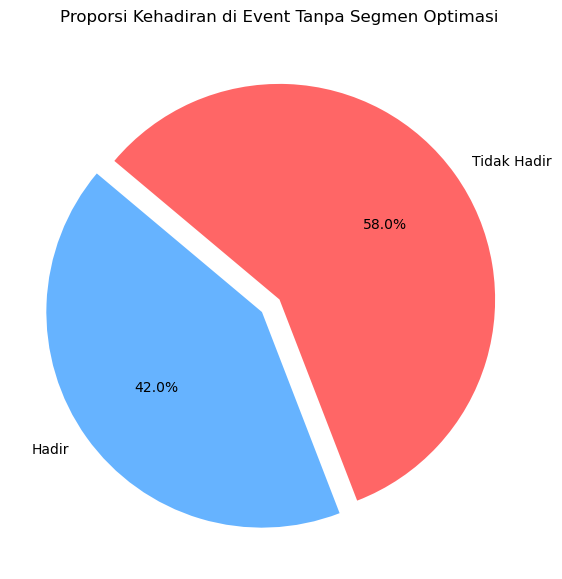

(41.9753086419753, 58.0246913580247)

In [79]:
# Hitung jumlah pelanggan yang hadir dan tidak hadir
attended_count = backtest_contacted[
    backtest_contacted["APAKAH CONFIRM DATANG COMGATH?\n(YA/TIDAK)"] == "YA"
].shape[0]

not_attended_count = backtest_contacted[
    backtest_contacted["APAKAH CONFIRM DATANG COMGATH?\n(YA/TIDAK)"] == "TIDAK"
].shape[0]

# Hitung total pelanggan yang terdata
total_customers = attended_count + not_attended_count

# Hitung persentase kehadiran
attended_percentage = (attended_count / total_customers) * 100
not_attended_percentage = (not_attended_count / total_customers) * 100

# Tampilkan hasil dalam bentuk visualisasi
labels = ["Hadir", "Tidak Hadir"]
sizes = [attended_percentage, not_attended_percentage]
colors = ["#66b3ff", "#ff6666"]
explode = (0.1, 0)  # Pisahkan sedikit segmen pertama

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, startangle=140)
plt.title("Proporsi Kehadiran di Event Tanpa Segmen Optimasi")
plt.show()

# Tampilkan nilai persentase
attended_percentage, not_attended_percentage


## Proporsi Kehadiran dari Dengan Segmen Optimasi

/var/folders/sh/_6wg56x97y7b5__x4qlx17hm0000gn/T/ipykernel_17245/393531445.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backtest_contacted['confirm_numeric'] = backtest_contacted["APAKAH CONFIRM DATANG COMGATH?\n(YA/TIDAK)"].apply(
/var/folders/sh/_6wg56x97y7b5__x4qlx17hm0000gn/T/ipykernel_17245/393531445.py:40: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/sh/_6wg56x97y7b5__x4qlx17hm0000gn/T/ipykernel_17245/393531445.py:40: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s

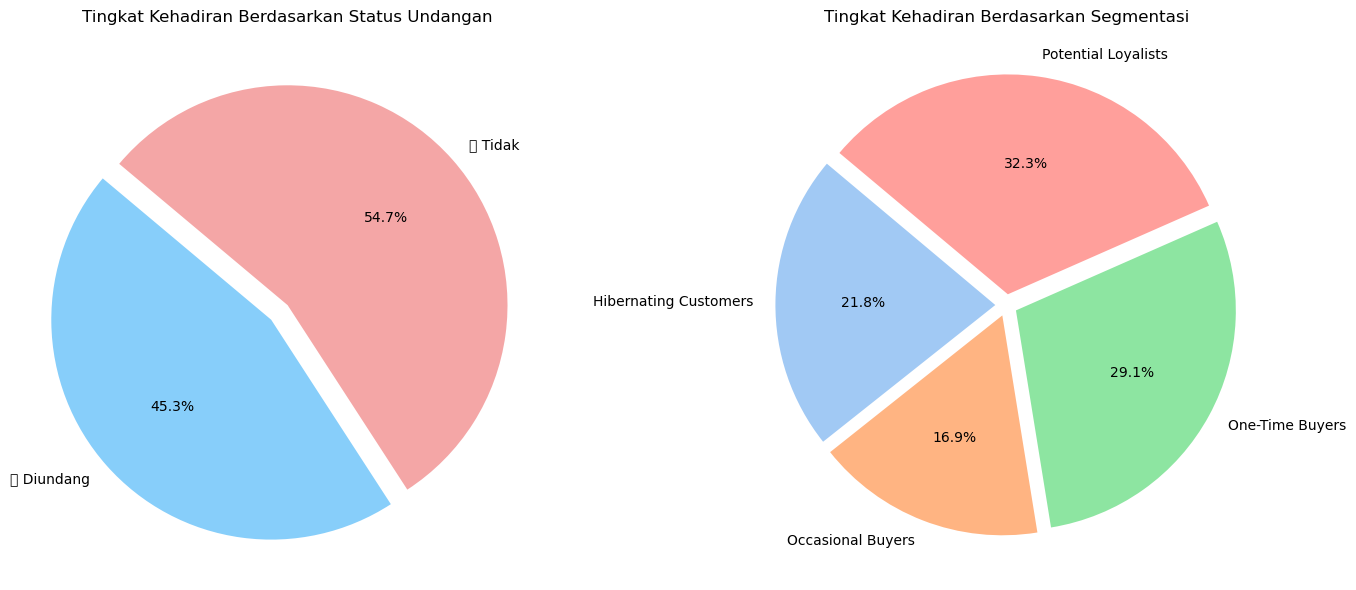

In [80]:
# Membuat kembali visualisasi dengan warna yang sesuai dengan gambar referensi

# Pastikan bahwa kolom "CONFIRM_DATANG" dan "Layak_Diundang_optimal" tersedia sebelum analisis
if "APAKAH CONFIRM DATANG COMGATH?\n(YA/TIDAK)" in backtest_contacted.columns and "Layak_Diundang_optimal" in backtest_contacted.columns:
    
    # Mengkonversi kolom string 'YA'/'TIDAK' menjadi nilai numerik 1/0
    backtest_contacted['confirm_numeric'] = backtest_contacted["APAKAH CONFIRM DATANG COMGATH?\n(YA/TIDAK)"].apply(
        lambda x: 1 if str(x).upper() == 'YA' else 0
    )
    
    # **1. Analisis Efektivitas Undangan (Diundang vs Tidak)**
    invitation_effectiveness = backtest_contacted.groupby("Layak_Diundang_optimal")["confirm_numeric"].mean() * 100

    # **3. Segmentasi Mana yang Paling Respon Terhadap Undangan?**
    segment_response = backtest_contacted.groupby("Segmentasi_optimal")["confirm_numeric"].mean() * 100

    # Membuat figure dengan 2 subplots untuk dua pie chart dengan warna yang sesuai
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Warna yang sesuai dengan referensi gambar
    colors1 = ["#87CEFA", "#F4A6A6"]  # Biru muda dan merah muda
    colors2 = sns.color_palette("pastel", len(segment_response))

    # Pie Chart untuk Efektivitas Undangan
    axes[0].pie(
        invitation_effectiveness, labels=invitation_effectiveness.index,
        autopct='%1.1f%%', colors=colors1, explode=(0.1, 0), startangle=140
    )
    axes[0].set_title("Tingkat Kehadiran Berdasarkan Status Undangan")

    # Pie Chart untuk Respons Segmen terhadap Undangan
    axes[1].pie(
        segment_response, labels=segment_response.index,
        autopct='%1.1f%%', colors=colors2, explode=[0.05] * len(segment_response),
        startangle=140
    )
    axes[1].set_title("Tingkat Kehadiran Berdasarkan Segmentasi")

    # Menyesuaikan layout agar lebih rapi
    plt.tight_layout()
    plt.show()

else:
    print("Kolom 'CONFIRM_DATANG' atau 'Layak_Diundang_optimal' tidak tersedia dalam dataset. Pastikan kolom ini ada sebelum melakukan analisis.")